<a href="https://colab.research.google.com/github/OhJin-Soo/Natural-Language-Processing-with-Transformers/blob/main/how_to_make_transformers_effeciently.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import pipeline

bert_ckpt = "transformersbook/bert-base-uncased-finetuned-clinc"
pipe = pipeline("text-classification", model=bert_ckpt)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [2]:
query = """Hey, I'd like to rent a vehicle from Nov 1st to Nov 15th in
Paris and I need a 15 passenger van"""
pipe(query)

[{'label': 'car_rental', 'score': 0.5490034222602844}]

In [3]:
class PerformanceBenchmark:
  def __init__(self, pipeline, dataset, optim_type = "BERT baseline"):
    self.pipeline = pipeline
    self.dataset = dataset
    self.optim_type = optim_type

  def compute_accuracy(self):
    pass

  def compute_size(self):
    pass

  def time_pipeline(self):
    pass

  def run_benchmark(self):
    metrics = {}
    metrics[self.optim_type] = self.compute_size()
    metrics[self.optim_type].update(self.time_pipeline())
    metrics[self.optim_type].update(self.compute_accuracy())
    return metrics

In [4]:
from datasets import load_dataset

clinc = load_dataset("clinc_oos", "plus")

README.md: 0.00B [00:00, ?B/s]

plus/train-00000-of-00001.parquet:   0%|          | 0.00/312k [00:00<?, ?B/s]

plus/validation-00000-of-00001.parquet:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

plus/test-00000-of-00001.parquet:   0%|          | 0.00/136k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15250 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5500 [00:00<?, ? examples/s]

In [5]:
sample = clinc["test"][42]
sample

{'text': 'transfer $100 from my checking to saving account', 'intent': 133}

In [6]:
intents = clinc["test"].features["intent"]
intents.int2str(sample["intent"])

'transfer'

In [7]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00


In [8]:
import evaluate

accuracy_score = evaluate.load("accuracy")

In [9]:
def compute_accuracy(self):
  preds, labels = [], []
  for example in self.dataset:
    pred = self.pipeline(example["text"])[0]["label"]
    label = example["intent"]
    preds.append(intents.str2int(pred))
    labels.append(label)
  accuracy = accuracy_score.compute(predictions = preds, references=labels)
  print(f"테스트 세트 정확도 - {accuracy['accuracy']:.3f}")
  return accuracy

PerformanceBenchmark.compute_accuracy = compute_accuracy

In [10]:
list(pipe.model.state_dict().items())[42]

('bert.encoder.layer.2.attention.self.value.bias',
 tensor([-2.7834e-02,  4.9434e-02,  8.3551e-02,  4.1092e-02,  6.0157e-01,
          1.1774e-01, -5.2112e-02, -6.5143e-02, -2.9358e-02, -4.2250e-02,
          7.9177e-02,  8.0409e-02,  2.9921e-03,  1.7816e-01, -5.0480e-02,
         -1.5634e-01, -2.1707e-02,  1.4381e-02,  2.5132e-02, -2.4110e-02,
         -1.9183e-01, -7.8657e-02,  5.0709e-02,  3.3632e-02, -3.1946e-02,
          1.1616e-01,  9.2720e-02, -1.1787e-01,  2.3233e-01, -1.2678e-02,
         -1.3138e-01, -4.0024e-02,  7.4823e-02, -5.4148e-02, -1.5184e-01,
         -7.4407e-02,  1.1559e-01,  8.2729e-02, -1.3787e-01,  8.3528e-02,
          1.2154e-01,  1.6880e-02, -5.6629e-02, -3.9295e-02,  5.3725e-02,
          6.8602e-02, -1.1294e-01,  4.4001e-02, -2.5884e-01,  1.6767e-01,
          1.8316e-01,  5.6272e-02, -3.6874e-02, -2.7938e-02, -9.3204e-02,
         -7.5239e-03,  4.1141e-02, -1.1542e-02, -9.9749e-02, -3.0910e-02,
          4.1398e-02, -4.4389e-02, -2.6279e-02,  7.2100e-02, 

In [11]:
import torch

torch.save(pipe.model.state_dict(), "model.pt")

In [12]:
import torch
from pathlib import Path

def compute_size(self):
  state_dict = self.pipeline.model.state_dict()
  tmp_path = Path("model.pt")
  torch.save(state_dict, tmp_path)
  size_mb = Path(tmp_path).stat().st_size / (1024 * 1024)

  tmp_path.unlink()
  print(f"모델 크기 (MB) - {size_mb:.2f}")
  return {"size_mb": size_mb}

PerformanceBenchmark.compute_size = compute_size

In [13]:
from time import perf_counter

for _ in range(3):
  start_time = perf_counter()
  _ = pipe(query)
  latency = perf_counter() - start_time
  print(f"레이턴시 (ms) - {1000 * latency:.3f}")

레이턴시 (ms) - 10.615
레이턴시 (ms) - 8.327
레이턴시 (ms) - 8.071


In [14]:
import numpy as np

def time_pipeline(self, query = "What is the pin number for my account"):
  latencies = []

  for _ in range(10):
    _ = self.pipeline(query)

  for _ in range(100):
    start_time = perf_counter()
    _ = self.pipeline(query)
    latency = perf_counter() - start_time
    latencies.append(latency)

  time_avg_ms = 1000 * np.mean(latencies)
  time_std_ms = 1000 * np.std(latencies)
  print(f"평균 레이턴시 (ms) - {time_avg_ms:.2f} +\- {time_std_ms:.2f}")
  return {"time_avg_ms": time_avg_ms, "time_std_ms": time_std_ms}

PerformanceBenchmark.time_pipeline = time_pipeline

<>:17: SyntaxWarning: invalid escape sequence '\-'
<>:17: SyntaxWarning: invalid escape sequence '\-'
/tmp/ipython-input-1890976749.py:17: SyntaxWarning: invalid escape sequence '\-'
  print(f"평균 레이턴시 (ms) - {time_avg_ms:.2f} +\- {time_std_ms:.2f}")


In [15]:
pb = PerformanceBenchmark(pipe, clinc["test"])
perf_metrics = pb.run_benchmark()

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


모델 크기 (MB) - 418.15
평균 레이턴시 (ms) - 9.28 +\- 1.35
테스트 세트 정확도 - 0.867


In [16]:
from transformers import TrainingArguments

class DistillationTrainingArguments(TrainingArguments):
  def __init__(self, *args, alpha = 0.5, temperature=2.0, **kwargs):
    super().__init__(*args,**kwargs)
    self.alpha = alpha
    self.temperature = temperature

In [17]:
import torch.nn as nn
import torch.nn.functional as F
from transformers import Trainer

class DistillationTrainer(Trainer):
  def __init__(self, *args, teacher_model=None, **kwargs):
    super().__init__(*args,**kwargs)
    self.teacher_model = teacher_model

  def compute_loss(self, model, inputs, return_outputs = False, *args, **kwargs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = inputs.to(device)
    outputs_stu = model(**inputs)

    loss_ce = outputs_stu.loss
    logits_stu = outputs_stu.logits

    with torch.no_grad():
      outputs_tea = self.teacher_model(**inputs)
      logits_tea = outputs_tea.logits

    loss_fct = nn.KLDivLoss(reduction = "batchmean")
    loss_kd = self.args.temperature ** 2 * loss_fct(
        F.log_softmax(logits_stu / self.args.temperature, dim = -1),
        F.softmax(logits_tea / self.args.temperature, dim=-1))
    loss = self.args.alpha * loss_ce + (1. - self.args.alpha) * loss_kd
    return (loss, outputs_stu) if return_outputs else loss

In [18]:
from transformers import AutoTokenizer

student_ckpt = "distilbert-base-uncased"
student_tokenizer = AutoTokenizer.from_pretrained(student_ckpt)

def tokenize_text(batch):
  return student_tokenizer(batch["text"], truncation=True)

clinc_enc = clinc.map(tokenize_text, batched=True, remove_columns=["text"])
clinc_enc = clinc_enc.rename_column("intent", "labels")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/15250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3100 [00:00<?, ? examples/s]

Map:   0%|          | 0/5500 [00:00<?, ? examples/s]

In [19]:
from huggingface_hub import notebook_login

notebook_login()

In [20]:
def compute_metrics(pred):
  predictions, labels = pred
  predictions = np.argmax(predictions, axis=1)
  return accuracy_score.compute(predictions = predictions, references = labels)

In [21]:
batch_size = 48

finetuned_ckpt = "distillbert-base-uncased-finetuned-clinc"

student_training_args = DistillationTrainingArguments(
    output_dir = finetuned_ckpt, eval_strategy="epoch",
    num_train_epochs = 5, learning_rate = 2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size, alpha = 1, weight_decay=0.01,
    push_to_hub=True
)

In [22]:
id2label = pipe.model.config.id2label
label2id = pipe.model.config.label2id

In [23]:
from transformers import AutoConfig

num_labels = intents.num_classes
student_config = (AutoConfig
                  .from_pretrained(student_ckpt, num_labels=num_labels,
                                   id2label = id2label, label2id = label2id))

In [24]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def student_init():
  return (AutoModelForSequenceClassification
          .from_pretrained(student_ckpt, config=student_config).to(device))

In [25]:
teacher_ckpt = "transformersbook/bert-base-uncased-finetuned-clinc"
teacher_model = (AutoModelForSequenceClassification
                 .from_pretrained(teacher_ckpt, num_labels=num_labels)
                 .to(device))

In [26]:
distillbert_trainer = DistillationTrainer(model_init = student_init,
                                          teacher_model = teacher_model, args = student_training_args,
                                          train_dataset = clinc_enc['train'], eval_dataset = clinc_enc['validation'],
                                          compute_metrics = compute_metrics, tokenizer = student_tokenizer)

distillbert_trainer.train()

/tmp/ipython-input-599170199.py:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `DistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args,**kwargs)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: jin-soo (jin-soo-none) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,3.283954,0.723871
2,3.787400,1.885441,0.844194
3,3.787400,1.178984,0.891935
4,1.711100,0.883988,0.908710
5,0.925800,0.798678,0.913871


TrainOutput(global_step=1590, training_loss=2.0645930164265183, metrics={'train_runtime': 96.8406, 'train_samples_per_second': 787.376, 'train_steps_per_second': 16.419, 'total_flos': 414689637990180.0, 'train_loss': 2.0645930164265183, 'epoch': 5.0})

In [27]:
distillbert_trainer.push_to_hub("Training completed!")

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...d-clinc/training_args.bin: 100%|##########| 5.91kB / 5.91kB            

  ...d-clinc/model.safetensors:  16%|#5        | 41.9MB /  268MB            

  ...18354.57b3fe309c10.1359.0: 100%|##########| 15.1kB / 15.1kB            

CommitInfo(commit_url='https://huggingface.co/jin-soo/distillbert-base-uncased-finetuned-clinc/commit/af28b92cd8cfe5eee9188961e70e3f1fc5511fbf', commit_message='Training completed!', commit_description='', oid='af28b92cd8cfe5eee9188961e70e3f1fc5511fbf', pr_url=None, repo_url=RepoUrl('https://huggingface.co/jin-soo/distillbert-base-uncased-finetuned-clinc', endpoint='https://huggingface.co', repo_type='model', repo_id='jin-soo/distillbert-base-uncased-finetuned-clinc'), pr_revision=None, pr_num=None)

In [28]:
finetuned_ckpt = "haesun/distilbert-base-uncased-finetuned-clinc"
pipe = pipeline("text-classification", model=finetuned_ckpt)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


In [29]:
optim_type = "DistilBERT"
pb = PerformanceBenchmark(pipe, clinc["test"], optim_type=optim_type)
perf_metrics.update(pb.run_benchmark())

모델 크기 (MB) - 255.88
평균 레이턴시 (ms) - 4.70 +\- 0.19
테스트 세트 정확도 - 0.856


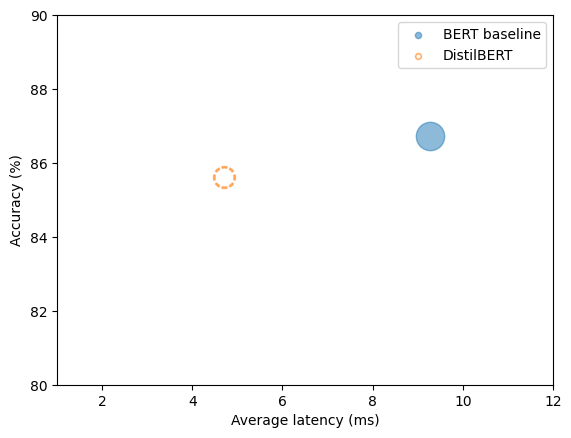

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics(perf_metrics, current_optim_type):
    df = pd.DataFrame.from_dict(perf_metrics, orient='index')

    for idx in df.index:
        df_opt = df.loc[idx]
        # 현재 최적화 방법을 점선으로 그립니다
        if idx == current_optim_type:
            plt.scatter(df_opt["time_avg_ms"], df_opt["accuracy"] * 100,
                        alpha=0.5, s=df_opt["size_mb"], label=idx,
                        marker='$\u25CC$')
        else:
            plt.scatter(df_opt["time_avg_ms"], df_opt["accuracy"] * 100,
                        s=df_opt["size_mb"], label=idx, alpha=0.5)

    legend = plt.legend(bbox_to_anchor=(1,1))
    for handle in legend.legend_handles:
        handle.set_sizes([20])

    plt.ylim(80,90)
    # 가장 느린 모델을 사용해 x 축 범위를 정합니다
    xlim = int(perf_metrics["BERT baseline"]["time_avg_ms"] + 3)
    plt.xlim(1, xlim)
    plt.ylabel("Accuracy (%)")
    plt.xlabel("Average latency (ms)")
    plt.show()

plot_metrics(perf_metrics, optim_type)

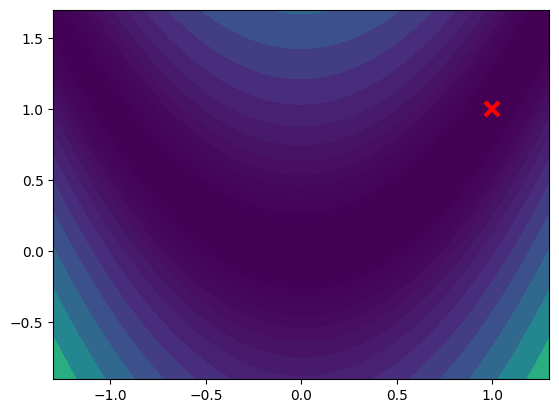

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, y):
    return (1-x)**2+100*(y-x**2)**2

X, Y = np.meshgrid(np.linspace(-2, 2, 250), np.linspace(-1, 3, 250))
Z = f(X,Y)
_, ax = plt.subplots()
ax.plot([1], [1], 'x', mew=3, markersize=10, color="red")
ax.contourf(X, Y, Z, np.logspace(-1, 3, 30), cmap='viridis', extend="both")
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-0.9, 1.7)
plt.show()

In [32]:
def objective(trial):
    x = trial.suggest_float("x", -2, 2)
    y = trial.suggest_float("y", -2, 2)
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

In [33]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 9.4 MB/s eta 0:00:00


In [34]:
import optuna

study = optuna.create_study()
study.optimize(objective, n_trials=1000)

[I 2025-10-01 11:35:05,725] A new study created in memory with name: no-name-4019c273-7cf8-47c5-8e5a-e2999c728658
[I 2025-10-01 11:35:05,727] Trial 0 finished with value: 287.82282472038764 and parameters: {'x': 1.8685802300554135, 'y': 1.7972827977034447}. Best is trial 0 with value: 287.82282472038764.
[I 2025-10-01 11:35:05,728] Trial 1 finished with value: 193.73775176300362 and parameters: {'x': 1.80465021765044, 'y': 1.867193087052112}. Best is trial 1 with value: 193.73775176300362.
[I 2025-10-01 11:35:05,729] Trial 2 finished with value: 205.95964876068143 and parameters: {'x': -1.50225906432268, 'y': 0.8436356360962938}. Best is trial 1 with value: 193.73775176300362.
[I 2025-10-01 11:35:05,731] Trial 3 finished with value: 17.512287960570127 and parameters: {'x': -0.024155650074161983, 'y': -0.4051675756092554}. Best is trial 3 with value: 17.512287960570127.
[I 2025-10-01 11:35:05,732] Trial 4 finished with value: 1.686275634758568 and parameters: {'x': -0.24169175298289058,

In [35]:
study.best_params

{'x': 0.9954642478134962, 'y': 0.9875668190352401}

In [36]:
def hp_space(trial):
    return {"num_train_epochs": trial.suggest_int("num_train_epochs", 5, 10),
        "alpha": trial.suggest_float("alpha", 0, 1),
        "temperature": trial.suggest_int("temperature", 2, 20)}

In [37]:
best_run = distillbert_trainer.hyperparameter_search(
    n_trials=20, direction="maximize", hp_space=hp_space)

[I 2025-10-01 11:35:14,815] A new study created in memory with name: no-name-b6571f19-734c-4a05-9807-240627a39ac2
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▅▇██
eval/loss,█▄▂▁▁
eval/runtime,█▁▃▁▅
eval/samples_per_second,▁█▆█▄
eval/steps_per_second,▁█▆█▄
train/epoch,▁▂▃▅▅▆███
train/global_step,▁▂▃▄▅▆███
train/grad_norm,█▄▁
train/learning_rate,█▅▁
train/loss,█▃▁
eval/accuracy,0.91387


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.216333,0.608387
2,0.349700,0.100106,0.838387
3,0.349700,0.063766,0.885806
4,0.116700,0.047783,0.900968
5,0.071200,0.038348,0.915161
6,0.071200,0.033363,0.920323
7,0.055100,0.030470,0.924194
8,0.047200,0.028581,0.926129
9,0.047200,0.027305,0.929355
10,0.043700,0.027015,0.930000


[I 2025-10-01 11:38:25,693] Trial 0 finished with value: 0.93 and parameters: {'num_train_epochs': 10, 'alpha': 0.08620443241197562, 'temperature': 6}. Best is trial 0 with value: 0.93.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆▇▇██████
eval/loss,█▄▂▂▁▁▁▁▁▁
eval/runtime,▂▅▁▂▂▂▁▃█▂
eval/samples_per_second,▇▄█▇▇▇█▆▁▇
eval/steps_per_second,▇▄█▇▇▇█▆▁▇
train/epoch,▁▁▂▃▃▃▄▄▅▅▆▆▆▇███
train/global_step,▁▁▂▃▃▃▄▄▅▅▆▆▆▇███
train/grad_norm,█▅▅▂▁▂
train/learning_rate,█▇▅▄▂▁
train/loss,█▃▂▁▁▁
eval/accuracy,0.93


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.205717,0.577419
2,0.326400,0.103574,0.817097
3,0.326400,0.071872,0.874194
4,0.119800,0.057979,0.889032
5,0.081400,0.050893,0.896129
6,0.081400,0.048715,0.898065


[I 2025-10-01 11:40:24,434] Trial 1 finished with value: 0.8980645161290323 and parameters: {'num_train_epochs': 6, 'alpha': 0.9023369483115987, 'temperature': 10}. Best is trial 0 with value: 0.93.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆▇███
eval/loss,█▃▂▁▁▁
eval/runtime,▁▁█▁▂▂
eval/samples_per_second,██▁█▇▇
eval/steps_per_second,██▁█▇▇
train/epoch,▁▂▂▄▄▅▆▇██
train/global_step,▁▂▂▄▄▅▆▇██
train/grad_norm,█▂▁
train/learning_rate,█▅▁
train/loss,█▂▁
eval/accuracy,0.89806


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.203862,0.590645
2,0.327600,0.098999,0.828065
3,0.327600,0.066054,0.878065
4,0.114800,0.051114,0.896129
5,0.073700,0.042289,0.905806
6,0.073700,0.037714,0.912581
7,0.059200,0.035535,0.915161
8,0.052900,0.034549,0.916774


[I 2025-10-01 11:43:10,418] Trial 2 finished with value: 0.9167741935483871 and parameters: {'num_train_epochs': 8, 'alpha': 0.9316379205167438, 'temperature': 9}. Best is trial 0 with value: 0.93.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆▇█████
eval/loss,█▄▂▂▁▁▁▁
eval/runtime,▁▁▁█▁▁▁▁
eval/samples_per_second,██▇▁███▇
eval/steps_per_second,██▇▁███▇
train/epoch,▁▂▂▃▃▄▅▅▆▆▇███
train/global_step,▁▂▂▃▃▄▅▅▆▆▇███
train/grad_norm,█▅▅▂▁
train/learning_rate,█▆▅▃▁
train/loss,█▃▂▁▁
eval/accuracy,0.91677


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.192129,0.583871
2,0.311400,0.093284,0.828065
3,0.311400,0.061910,0.879355
4,0.108100,0.047518,0.897742
5,0.068300,0.038740,0.910968
6,0.068300,0.033898,0.916129
7,0.053700,0.031082,0.921613
8,0.046200,0.029113,0.924839
9,0.046200,0.027831,0.924839
10,0.042800,0.027508,0.927419


It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`hf upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.
It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`hf upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.
[I 2025-10-01 11:46:48,017] Trial 3 finished with value: 0.9274193548387096 and parameters: {'num_train_epochs': 10, 'alpha': 0.06742273330604542, 'temperature': 14}. Best is trial 0 with value: 0.93.
Some weights of DistilBertFor

eval/accuracy,▁▆▇▇██████
eval/loss,█▄▂▂▁▁▁▁▁▁
eval/runtime,▁▁▁▁█▃▁▁▁▂
eval/samples_per_second,██▇█▁▆█▇█▇
eval/steps_per_second,██▇█▁▆█▇█▇
train/epoch,▁▁▂▃▃▃▄▄▅▅▆▆▆▇███
train/global_step,▁▁▂▃▃▃▄▄▅▅▆▆▆▇███
train/grad_norm,█▄▅▂▁▂
train/learning_rate,█▇▅▄▂▁
train/loss,█▃▂▁▁▁
eval/accuracy,0.92742


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.214303,0.594516
2,0.342200,0.103943,0.827097
3,0.342200,0.069473,0.876129
4,0.120600,0.054143,0.894516
5,0.078200,0.045553,0.904516
6,0.078200,0.041502,0.908387
7,0.064200,0.040304,0.908387


It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`hf upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.
[I 2025-10-01 11:48:53,541] Trial 4 finished with value: 0.9083870967741936 and parameters: {'num_train_epochs': 7, 'alpha': 0.17338599885199313, 'temperature': 7}. Best is trial 0 with value: 0.93.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆▇████
eval/loss,█▄▂▂▁▁▁
eval/runtime,▁▁▁▁▁█▃
eval/samples_per_second,█████▁▅
eval/steps_per_second,█████▁▅
train/epoch,▁▂▂▃▄▅▅▆▇▇██
train/global_step,▁▂▂▃▄▅▅▆▇▇██
train/grad_norm,█▄▄▁
train/learning_rate,█▆▃▁
train/loss,█▂▁▁
eval/accuracy,0.90839


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.198768,0.593226
2,0.321700,0.095356,0.832258
3,0.321700,0.062601,0.881935
4,0.110600,0.047758,0.898387
5,0.069300,0.038702,0.912903
6,0.069300,0.033803,0.917097
7,0.054200,0.030951,0.923548
8,0.046500,0.028982,0.925161
9,0.046500,0.027699,0.926452


It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`hf upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.
[I 2025-10-01 11:51:14,978] Trial 5 pruned. 
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆▇▇█████
eval/loss,█▄▂▂▁▁▁▁▁
eval/runtime,▁▂▁▁▂▂█▄▂
eval/samples_per_second,█▇▇█▇▇▁▅▇
eval/steps_per_second,█▇▇█▇▇▁▅▇
train/epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
train/global_step,▁▂▂▃▃▄▄▄▅▆▆▇▇█
train/grad_norm,█▄▅▂▁
train/learning_rate,█▆▅▃▁
train/loss,█▃▂▁▁
eval/accuracy,0.92645


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.208368,0.582581


[I 2025-10-01 11:51:32,235] Trial 6 pruned. 
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁
eval/loss,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁
train/global_step,▁
eval/accuracy,0.58258
eval/loss,0.20837
eval/runtime,1.5082
eval/samples_per_second,2055.399


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.209355,0.589355


[I 2025-10-01 11:51:48,649] Trial 7 pruned. 
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁
eval/loss,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁
train/global_step,▁
eval/accuracy,0.58935
eval/loss,0.20936
eval/runtime,1.5062
eval/samples_per_second,2058.174


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.199502,0.561935


[I 2025-10-01 11:52:04,934] Trial 8 pruned. 
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁
eval/loss,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁
train/global_step,▁
eval/accuracy,0.56194
eval/loss,0.1995
eval/runtime,1.5083
eval/samples_per_second,2055.248


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.292389,0.629677
2,0.461200,0.121981,0.840323
3,0.461200,0.073120,0.882903
4,0.143400,0.054045,0.904516
5,0.084000,0.044773,0.915806
6,0.084000,0.040552,0.916774
7,0.067000,0.039329,0.918387


It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`hf upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.
[I 2025-10-01 11:53:52,963] Trial 9 pruned. 
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆▇████
eval/loss,█▃▂▁▁▁▁
eval/runtime,▆▅▁▇▆██
eval/samples_per_second,▂▄█▂▃▁▁
eval/steps_per_second,▃▄█▂▃▁▁
train/epoch,▁▂▂▃▄▅▅▆▇▇█
train/global_step,▁▂▂▃▄▅▅▆▇▇█
train/grad_norm,█▄▃▁
train/learning_rate,█▆▃▁
train/loss,█▂▁▁
eval/accuracy,0.91839


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.406896,0.673871
2,0.639600,0.138353,0.841290
3,0.639600,0.072014,0.891290
4,0.163100,0.051568,0.914516
5,0.081600,0.042928,0.921290
6,0.081600,0.038037,0.929355
7,0.062000,0.035673,0.931613
8,0.053900,0.034261,0.931290
9,0.053900,0.033642,0.931613


It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`hf upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.
[I 2025-10-01 11:57:54,588] Trial 10 finished with value: 0.9316129032258065 and parameters: {'num_train_epochs': 9, 'alpha': 0.39751895458473047, 'temperature': 2}. Best is trial 10 with value: 0.9316129032258065.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆▇██████
eval/loss,█▃▂▁▁▁▁▁▁
eval/runtime,▄▂▁▁█▁▁▁▁
eval/samples_per_second,▄▇██▁████
eval/steps_per_second,▄▇██▁████
train/epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇██
train/global_step,▁▂▂▃▃▄▄▄▅▆▆▇▇██
train/grad_norm,█▄▄▂▁
train/learning_rate,█▆▅▃▁
train/loss,█▂▁▁▁
eval/accuracy,0.93161


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.287086,0.636452
2,0.457500,0.115613,0.845484
3,0.457500,0.067167,0.890968
4,0.136500,0.048555,0.907742
5,0.076800,0.039328,0.919355
6,0.076800,0.034637,0.922903
7,0.058900,0.032170,0.926774
8,0.051100,0.030640,0.928065
9,0.051100,0.030113,0.926774


It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`hf upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.
[I 2025-10-01 12:00:12,892] Trial 11 pruned. 
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆▇██████
eval/loss,█▃▂▂▁▁▁▁▁
eval/runtime,▁▃▃▂▃▃▄▄█
eval/samples_per_second,█▆▆▇▆▆▅▅▁
eval/steps_per_second,█▆▆▇▆▆▅▅▁
train/epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
train/global_step,▁▂▂▃▃▄▄▄▅▆▆▇▇█
train/grad_norm,█▅▄▂▁
train/learning_rate,█▆▅▃▁
train/loss,█▂▁▁▁
eval/accuracy,0.92677


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.406896,0.673871
2,0.639600,0.138353,0.841290
3,0.639600,0.072014,0.891290
4,0.163100,0.051568,0.914516
5,0.081600,0.042928,0.921290
6,0.081600,0.038037,0.929355
7,0.062000,0.035673,0.931613
8,0.053900,0.034261,0.931290
9,0.053900,0.033642,0.931613


It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`hf upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.
[I 2025-10-01 12:04:30,494] Trial 12 finished with value: 0.9316129032258065 and parameters: {'num_train_epochs': 9, 'alpha': 0.623859884056492, 'temperature': 2}. Best is trial 10 with value: 0.9316129032258065.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆▇██████
eval/loss,█▃▂▁▁▁▁▁▁
eval/runtime,██▂▁▁▁▂▁▁
eval/samples_per_second,▁▁▇███▇██
eval/steps_per_second,▁▁▇███▇██
train/epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇██
train/global_step,▁▂▂▃▃▄▄▄▅▆▆▇▇██
train/grad_norm,█▄▄▂▁
train/learning_rate,█▆▅▃▁
train/loss,█▂▁▁▁
eval/accuracy,0.93161


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.406896,0.673871
2,0.639600,0.138353,0.841290
3,0.639600,0.072014,0.891290
4,0.163100,0.051568,0.914516
5,0.081600,0.042928,0.921290
6,0.081600,0.038037,0.929355
7,0.062000,0.035673,0.931613
8,0.053900,0.034261,0.931290
9,0.053900,0.033642,0.931613


It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`hf upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.
[I 2025-10-01 12:08:23,465] Trial 13 finished with value: 0.9316129032258065 and parameters: {'num_train_epochs': 9, 'alpha': 0.6097202853156938, 'temperature': 2}. Best is trial 10 with value: 0.9316129032258065.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆▇██████
eval/loss,█▃▂▁▁▁▁▁▁
eval/runtime,▁▁▄▃▁▇▃█▄
eval/samples_per_second,██▅▆█▂▆▁▅
eval/steps_per_second,██▅▆█▂▆▁▅
train/epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇██
train/global_step,▁▂▂▃▃▄▄▄▅▆▆▇▇██
train/grad_norm,█▄▄▂▁
train/learning_rate,█▆▅▃▁
train/loss,█▂▁▁▁
eval/accuracy,0.93161


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.228338,0.613226
2,0.367300,0.104205,0.836774
3,0.367300,0.065833,0.884839
4,0.121700,0.049170,0.901613
5,0.074000,0.039696,0.915161
6,0.074000,0.034757,0.919355
7,0.057600,0.032108,0.923226


It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`hf upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.
[I 2025-10-01 12:10:11,377] Trial 14 pruned. 
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆▇████
eval/loss,█▄▂▂▁▁▁
eval/runtime,▁▅▅▆▇▆█
eval/samples_per_second,█▄▄▃▂▃▁
eval/steps_per_second,█▄▄▃▂▃▁
train/epoch,▁▂▂▃▄▅▅▆▇▇█
train/global_step,▁▂▂▃▄▅▅▆▇▇█
train/grad_norm,█▄▄▁
train/learning_rate,█▆▃▁
train/loss,█▂▁▁
eval/accuracy,0.92323


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.194630,0.576774


[I 2025-10-01 12:10:28,180] Trial 15 pruned. 
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁
eval/loss,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁
train/global_step,▁
eval/accuracy,0.57677
eval/loss,0.19463
eval/runtime,1.525
eval/samples_per_second,2032.755


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.188710,0.573226


[I 2025-10-01 12:10:44,948] Trial 16 pruned. 
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁
eval/loss,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁
train/global_step,▁
eval/accuracy,0.57323
eval/loss,0.18871
eval/runtime,1.5063
eval/samples_per_second,2057.965


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.229943,0.610968
2,0.368400,0.106224,0.836129
3,0.368400,0.067934,0.881935


[I 2025-10-01 12:11:32,053] Trial 17 pruned. 
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▇█
eval/loss,█▃▁
eval/runtime,▁▂█
eval/samples_per_second,█▇▁
eval/steps_per_second,█▇▁
train/epoch,▁▃▅█
train/global_step,▁▃▄█
train/grad_norm,▁
train/learning_rate,▁
train/loss,▁
eval/accuracy,0.88194


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.406896,0.673871
2,0.639600,0.138353,0.841290
3,0.639600,0.072014,0.891290
4,0.163100,0.051568,0.914516
5,0.081600,0.042928,0.921290
6,0.081600,0.038037,0.929355
7,0.062000,0.035673,0.931613
8,0.053900,0.034261,0.931290
9,0.053900,0.033642,0.931613


It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`hf upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.
[I 2025-10-01 12:17:07,291] Trial 18 finished with value: 0.9316129032258065 and parameters: {'num_train_epochs': 9, 'alpha': 0.6770521938581171, 'temperature': 2}. Best is trial 10 with value: 0.9316129032258065.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆▇██████
eval/loss,█▃▂▁▁▁▁▁▁
eval/runtime,▇█▇▁▂▁▁▂▁
eval/samples_per_second,▂▁▂█▇██▇█
eval/steps_per_second,▂▁▂█▇██▇█
train/epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇██
train/global_step,▁▂▂▃▃▄▄▄▅▆▆▇▇██
train/grad_norm,█▄▄▂▁
train/learning_rate,█▆▅▃▁
train/loss,█▂▁▁▁
eval/accuracy,0.93161


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.193277,0.586774


[I 2025-10-01 12:17:24,006] Trial 19 pruned. 


In [38]:
print(best_run)

BestRun(run_id='10', objective=0.9316129032258065, hyperparameters={'num_train_epochs': 9, 'alpha': 0.39751895458473047, 'temperature': 2}, run_summary=None)


In [39]:
for k,v in best_run.hyperparameters.items():
    setattr(student_training_args, k, v)

In [40]:
for k,v in best_run.hyperparameters.items():
    setattr(student_training_args, k, v)

# 정제된 모델을 저장할 새로운 저장소를 정의합니다
distilled_ckpt = "distilbert-base-uncased-distilled-clinc"
student_training_args.output_dir = distilled_ckpt

# 최적의 매개변수로 새로운 Trainer를 만듭니다
distil_trainer = DistillationTrainer(model_init=student_init,
    teacher_model=teacher_model, args=student_training_args,
    train_dataset=clinc_enc['train'], eval_dataset=clinc_enc['validation'],
    compute_metrics=compute_metrics, tokenizer=student_tokenizer)

distil_trainer.train();

/tmp/ipython-input-599170199.py:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `DistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args,**kwargs)
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.556792,0.720323
2,1.892400,0.799077,0.858387
3,1.892400,0.475308,0.908710
4,0.729900,0.353148,0.932581
5,0.356000,0.306471,0.940000
6,0.356000,0.286578,0.941613
7,0.259300,0.277861,0.943548
8,0.229400,0.273579,0.945161
9,0.229400,0.271769,0.945484


In [41]:
distil_trainer.push_to_hub("Training complete")

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...d-clinc/training_args.bin: 100%|##########| 5.91kB / 5.91kB            

  ...d-clinc/model.safetensors:  16%|#5        | 41.9MB /  268MB            

CommitInfo(commit_url='https://huggingface.co/jin-soo/distilbert-base-uncased-distilled-clinc/commit/7af86bf577ea37b6b7c9d76f43edec3abfeb8b8a', commit_message='Training complete', commit_description='', oid='7af86bf577ea37b6b7c9d76f43edec3abfeb8b8a', pr_url=None, repo_url=RepoUrl('https://huggingface.co/jin-soo/distilbert-base-uncased-distilled-clinc', endpoint='https://huggingface.co', repo_type='model', repo_id='jin-soo/distilbert-base-uncased-distilled-clinc'), pr_revision=None, pr_num=None)

In [42]:
# `haesun`를 자신의 허브 사용자 이름으로 바꾸세요.
distilled_ckpt = "jin-soo/distilbert-base-uncased-distilled-clinc"
pipe = pipeline("text-classification", model=distilled_ckpt)
optim_type = "Distillation"
pb = PerformanceBenchmark(pipe, clinc["test"], optim_type=optim_type)
perf_metrics.update(pb.run_benchmark())

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


모델 크기 (MB) - 255.88
평균 레이턴시 (ms) - 4.55 +\- 0.10
테스트 세트 정확도 - 0.878


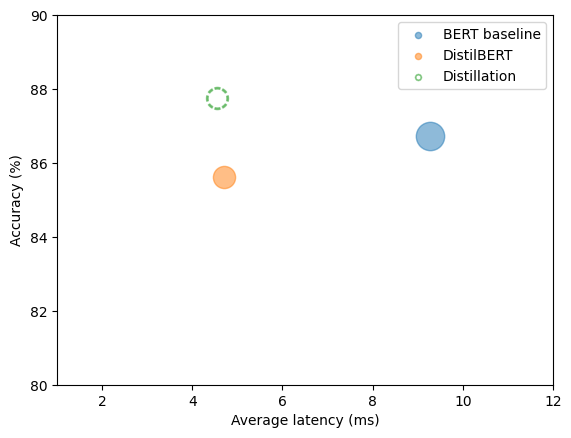

In [43]:
plot_metrics(perf_metrics, optim_type)

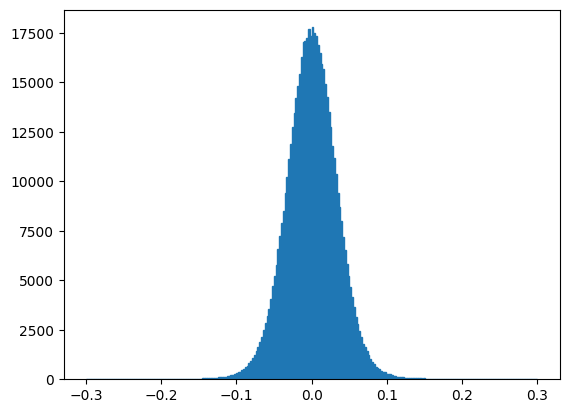

In [45]:
import matplotlib.pyplot as plt

state_dict = pipe.model.state_dict()
weights = state_dict["distilbert.transformer.layer.0.attention.out_lin.weight"]
plt.hist(weights.flatten().cpu().numpy(), bins=250, range=(-0.3,0.3), edgecolor="C0")
plt.show()

In [46]:
zero_point = 0
scale = (weights.max() - weights.min()) / (127 - (-128))

In [47]:

from torch import quantize_per_tensor

dtype = torch.qint8
quantized_weights = quantize_per_tensor(weights, scale, zero_point, dtype)
quantized_weights.int_repr()

tensor([[ -5,  -8,   0,  ...,  -6,  -4,   8],
        [  9,   2,   1,  ...,  -4,   7,   0],
        [ -9,  -5,   6,  ...,   0,   6,  -4],
        ...,
        [  6,   0,  13,  ...,   0,   6,  -1],
        [  0,  -2, -12,  ...,  12,  -7, -13],
        [-13,  -1,  -9,  ...,   8,   2,  -1]], device='cuda:0',
       dtype=torch.int8)

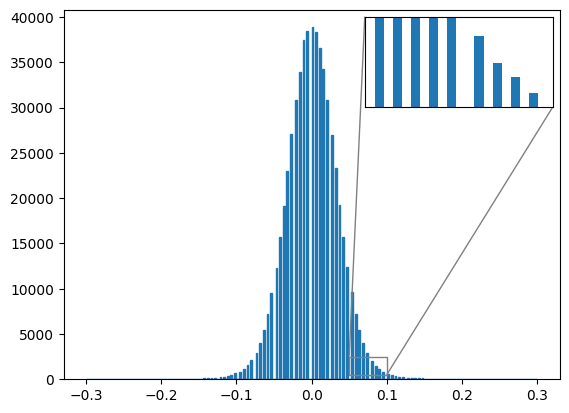

In [49]:
# 트랜스포머 가중치에서 양자화 효과
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset

# 히스토그램 그리기
fig, ax = plt.subplots()
ax.hist(quantized_weights.dequantize().flatten().cpu().numpy(),
         bins=250, range=(-0.3,0.3), edgecolor="C0");
# 확대 그림 만들기
axins = zoomed_inset_axes(ax, 5, loc='upper right')
axins.hist(quantized_weights.dequantize().flatten().cpu().numpy(),
         bins=250, range=(-0.3,0.3));
x1, x2, y1, y2 = 0.05, 0.1, 500, 2500
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.axes.xaxis.set_visible(False)
axins.axes.yaxis.set_visible(False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.show()

In [50]:
%%timeit
weights @ weights

62.8 µs ± 2.62 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [51]:
from torch.nn.quantized import QFunctional

q_fn = QFunctional()

In [53]:

%%timeit
q_fn.mul(quantized_weights.cpu(), quantized_weights.cpu())

The slowest run took 4.30 times longer than the fastest. This could mean that an intermediate result is being cached.
1.44 ms ± 970 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [54]:
import sys

sys.getsizeof(weights.untyped_storage()) / sys.getsizeof(quantized_weights.untyped_storage())

3.999633833760527

In [73]:
from torch.quantization import quantize_dynamic

# `haesun`를 자신의 허브 사용자 이름으로 바꾸세요.
model_ckpt = "jin-soo/distilbert-base-uncased-distilled-clinc"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt).to("cpu"))

model_quantized = quantize_dynamic(model, {nn.Linear}, dtype=torch.qint8)

/tmp/ipython-input-433524477.py:9: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model_quantized = quantize_dynamic(model, {nn.Linear}, dtype=torch.qint8)


In [74]:
pipe = pipeline("text-classification", model=model_quantized,
                tokenizer=tokenizer)
pipe.device

Device set to use cuda:0


device(type='cuda', index=0)

In [75]:
pipe = pipeline("text-classification", model=model_quantized.cpu(),
                tokenizer=tokenizer, device = -1)
optim_type = "Distillation + quantization"
pb = PerformanceBenchmark(pipe, clinc["test"], optim_type=optim_type)
perf_metrics.update(pb.run_benchmark())

Device set to use cpu


모델 크기 (MB) - 132.39
평균 레이턴시 (ms) - 8.75 +\- 0.73
테스트 세트 정확도 - 0.890


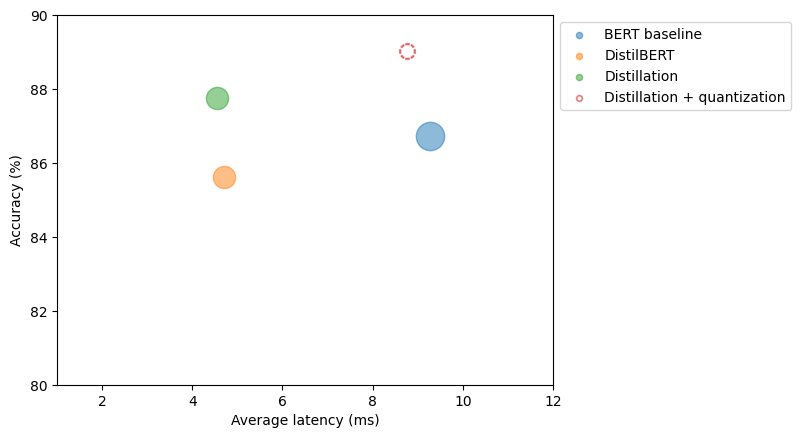

In [76]:
plot_metrics(perf_metrics, optim_type)

In [77]:
import os
from psutil import cpu_count

os.environ["OMP_NUM_THREADS"] = f"{cpu_count()}"
os.environ["OMP_WAIT_POLICY"] = "ACTIVE"

In [91]:
from transformers.convert_graph_to_onnx import convert

# `haesun`를 자신의 허브 사용자 이름으로 바꾸세요.
model_ckpt = "jin-soo/distilbert-base-uncased-distilled-clinc"
onnx_model_path = Path("onnx/model.onnx")
convert(framework="pt", model=model_ckpt, tokenizer=tokenizer,
        output=onnx_model_path, opset=12, pipeline_name="text-classification")

/usr/local/lib/python3.12/dist-packages/transformers/convert_graph_to_onnx.py:361: FutureWarning: The `transformers.convert_graph_to_onnx` package is deprecated and will be removed in version 5 of Transformers
  warnings.warn(


ONNX opset version set to: 12
Loading pipeline (model: jin-soo/distilbert-base-uncased-distilled-clinc, tokenizer: DistilBertTokenizerFast(name_or_path='jin-soo/distilbert-base-uncased-distilled-clinc', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=F

Device set to use cuda:0


Using framework PyTorch: 2.8.0+cu126


RuntimeError: Expected all tensors to be on the same device, but got index is on cpu, different from other tensors on cuda:0 (when checking argument in method wrapper_CUDA__index_select)

In [ ]:
from onnxruntime import (GraphOptimizationLevel, InferenceSession,
                         SessionOptions)

def create_model_for_provider(model_path, provider="CPUExecutionProvider"):
    options = SessionOptions()
    options.intra_op_num_threads = 1
    options.graph_optimization_level = GraphOptimizationLevel.ORT_ENABLE_ALL
    session = InferenceSession(str(model_path), options, providers=[provider])
    session.disable_fallback()
    return session

In [79]:
onnx_model = create_model_for_provider(onnx_model_path)

NameError: name 'create_model_for_provider' is not defined

In [80]:
inputs = clinc_enc["test"][:1]
del inputs["labels"]
logits_onnx = onnx_model.run(None, inputs)[0]
logits_onnx.shape

NameError: name 'onnx_model' is not defined

In [81]:
np.argmax(logits_onnx)

NameError: name 'logits_onnx' is not defined

In [82]:
clinc_enc["test"][0]["labels"]

61

In [83]:
from scipy.special import softmax

class OnnxPipeline:
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer

    def __call__(self, query):
        model_inputs = self.tokenizer(query, return_tensors="pt")
        inputs_onnx = {k: v.cpu().detach().numpy()
                       for k, v in model_inputs.items()}
        logits = self.model.run(None, inputs_onnx)[0][0, :]
        probs = softmax(logits)
        pred_idx = np.argmax(probs).item()
        return [{"label": intents.int2str(pred_idx), "score": probs[pred_idx]}]

In [84]:
pipe = OnnxPipeline(onnx_model, tokenizer)
pipe(query)

NameError: name 'onnx_model' is not defined

In [85]:
class OnnxPerformanceBenchmark(PerformanceBenchmark):
    def __init__(self, *args, model_path, **kwargs):
        super().__init__(*args, **kwargs)
        self.model_path = model_path

    def compute_size(self):
        size_mb = Path(self.model_path).stat().st_size / (1024 * 1024)
        print(f"모델 크기 (MB) - {size_mb:.2f}")
        return {"size_mb": size_mb}

In [86]:
optim_type = "Distillation + ORT"
pb = OnnxPerformanceBenchmark(pipe, clinc["test"], optim_type,
                              model_path="onnx/model.onnx")
perf_metrics.update(pb.run_benchmark())

FileNotFoundError: [Errno 2] No such file or directory: 'onnx/model.onnx'

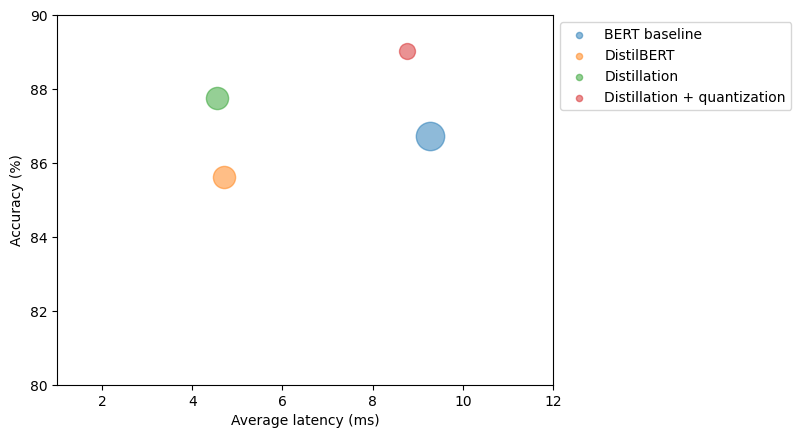

In [87]:
plot_metrics(perf_metrics, optim_type)

In [88]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.7 MB/s eta 0:00:00


In [89]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 125.1 MB/s eta 0:00:00


In [ ]:
from onnxruntime.quantization import quantize_dynamic, QuantType

model_input = "onnx/model.onnx"
model_output = "onnx/model.quant.onnx"
quantize_dynamic(model_input, model_output, weight_type=QuantType.QInt8)

In [ ]:
onnx_quantized_model = create_model_for_provider(model_output)
pipe = OnnxPipeline(onnx_quantized_model, tokenizer)
optim_type = "Distillation + ORT (quantized)"
pb = OnnxPerformanceBenchmark(pipe, clinc["test"], optim_type,
                              model_path=model_output)
perf_metrics.update(pb.run_benchmark())

In [ ]:
plot_metrics(perf_metrics, optim_type)

In [ ]:
# 가지치기에 사용되는 세제곱 희소성 스케줄러
import numpy as np
import matplotlib.pyplot as plt

def _sparsity(t, t_0=0, dt=1, s_i=0, s_f=0.9, N=100):
    return s_f + (s_i - s_f) * (1 - (t - t_0) / (N * dt))**3

steps = np.linspace(0,100,100)
values = [_sparsity(t) for t in steps]

fig, ax = plt.subplots()
ax.plot(steps, values)
ax.set_ylim(0,1)
ax.set_xlim(0,100)
ax.set_xlabel("Pruning step")
ax.set_ylabel("Sparsity")
plt.grid(linestyle="dashed")
plt.show()